## Simple workflow of Langgraph

In [2]:
def function_1(input_1):
    return input_1 + " First Function "

def function_2(input_2):
    return input_2 + "to Second Function"

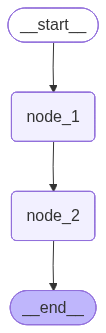

🟩 Output from node 'node_1':
{'value': 'I am moving from First Function '}
---


🟩 Output from node 'node_2':
{'value': 'I am moving from First Function I am fine to Second Function'}
---


✅ Final Result: {'value': 'I am moving from First Function I am fine to Second Function'}


In [3]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

# 🧩 Your original plain Python functions
def function_1(input_1):
    return input_1 + " First Function "

def function_3(input_3):
    return input_3 

def function_2(input_2):
    output_2 = function_3("I am fine")
    return input_2 + output_2+" to Second Function"



# 🧱 Define a simple state schema (LangGraph requires it)
class SimpleState(TypedDict):
    value: str

# 🧩 Wrapper to adapt plain functions for LangGraph compatibility
def wrap(func):
    def node(state: SimpleState) -> SimpleState:
        result = func(state["value"])
        return {"value": result}   # Pass updated state to the next node
    return node

# ⚙️ Build the workflow
workflow = StateGraph(SimpleState)

# Add nodes using wrapped functions
workflow.add_node("node_1", wrap(function_1))
workflow.add_node("node_2", wrap(function_2))

# Define graph edges
workflow.add_edge(START, "node_1")
workflow.add_edge("node_1", "node_2")
workflow.add_edge("node_2", END)

# ✅ Compile the workflow
app = workflow.compile()

# 🧭 Visualize the workflow (Mermaid diagram)
display(Image(app.get_graph().draw_mermaid_png()))

# 🚀 Input for streaming
input_state = {"value": "I am moving from"}

# 🧠 Stream execution node-by-node
for output in app.stream(input_state):
    # Each `output` is a dict where key = node name, value = partial state
    for key, value in output.items():
        print(f"🟩 Output from node '{key}':")
        print(value)
        print("---")
    final_output = list(output.values())[-1]
    print("\n====================\n")

# ✅ You can still access final result
print("✅ Final Result:", final_output)

##Create workflow with LLM

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()


GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT=os.getenv("LANGCHAIN_PROJECT")


os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
#os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"]= GROQ_API_KEY
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"]=LANGCHAIN_PROJECT

In [2]:
from langchain_groq import ChatGroq
llm_groq = ChatGroq(model="llama-3.3-70b-versatile")

d:\PythonCode\Langgraph-End-To-End\langgraphvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
llm_groq.invoke("Hi, How are you")

AIMessage(content="I'm doing well, thanks for asking. I'm a large language model, so I don't have feelings or emotions like humans do, but I'm always happy to chat with you and help with any questions or topics you'd like to discuss. How about you? How's your day going so far?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 63, 'prompt_tokens': 40, 'total_tokens': 103, 'completion_time': 0.099833552, 'prompt_time': 0.001828475, 'queue_time': 0.054814865, 'total_time': 0.101662027}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_2ddfbb0da0', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--75dca198-bf93-44f5-aced-34183f878adc-0', usage_metadata={'input_tokens': 40, 'output_tokens': 63, 'total_tokens': 103})

In [4]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

class SimpleLLMState(TypedDict):
    value: str

In [ ]:
def function_1(State: SimpleLLMState):
    value= State["value"]
    complete_query = "Your task is to provide only the topic based on the user query. \
        Only output the topic among: [Japan , Sports]. Don't include reasoning. Following is the user query:" + value
    response = llm_groq.invoke(complete_query)
    return response.content

def function_2(State: SimpleLLMState):
    value= State["value"]
    TOPIC_UPPER = value.upper()
    response = f"Here is the topic in UPPER case: {TOPIC_UPPER}"
    return response

In [21]:
#def wrap(func):
 #   def node(state: SimpleLLMState) -> SimpleState:
  #      # Extract string from dict
   #     text = state["value"]
        # Run the original function
    #    result = func(text)
        # Return new dict for next node
     #   return {"value": result}
    #return node

In [13]:
workflow2 = StateGraph(SimpleLLMState)

In [14]:
workflow2.add_node("Agent", function_1)
workflow2.add_node("tool", function_2)

workflow2.add_edge(START, 'Agent')
workflow2.add_edge('Agent','tool')
workflow2.add_edge('tool',END) 

app2 = workflow2.compile()


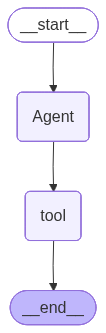

In [15]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [16]:

input_state={"value":"Tell me about japan's industrial growth"}
result = app2.invoke(input_state)   
result

InvalidUpdateError: Expected dict, got Japan
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE